In [2]:
from bagpy import bagreader
bagpath = "../data/raw/Sample-Data/Sample-Data.bag"
b = bagreader(bagpath)
print(b.topic_table)

[INFO]  Data folder ../data/raw/Sample-Data/Sample-Data already exists. Not creating.
                Topics                         Types  Message Count  \
0                 /gps         sensor_msgs/NavSatFix           4896   
1            /gps_time     sensor_msgs/TimeReference           4896   
2    /image_front_left             sensor_msgs/Image            326   
3                 /imu               sensor_msgs/Imu           4896   
4     /lidar_blue_scan    velodyne_msgs/VelodyneScan            246   
5    /lidar_green_scan    velodyne_msgs/VelodyneScan            246   
6      /lidar_red_scan    velodyne_msgs/VelodyneScan            246   
7   /lidar_yellow_scan    velodyne_msgs/VelodyneScan            245   
8   /pose_ground_truth     geometry_msgs/PoseStamped           4858   
9      /pose_localized     geometry_msgs/PoseStamped            539   
10           /pose_raw     geometry_msgs/PoseStamped           4872   
11                 /tf            tf2_msgs/TFMessage          

Lets explore some of the data

In [3]:
import pandas as pd
for topic in b.topic_table['Topics']:
    csv = b.message_by_topic(topic)
    df = pd.read_csv(csv)
    print(f"Data from topic '{topic}':")
    print(df.head())

Data from topic '/gps':
           Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0  1.501822e+09           6         1501822123            31317949   
1  1.501822e+09          70         1501822123            39287090   
2  1.501822e+09          89         1501822123            41313886   
3  1.501822e+09         159         1501822123            49295902   
4  1.501822e+09         180         1501822123            51310062   

  header.frame_id  status.status  status.service   latitude  longitude  \
0             gps              0               0  42.305971 -83.244833   
1             gps              0               0  42.305971 -83.244833   
2             gps              0               0  42.305971 -83.244833   
3             gps              0               0  42.305971 -83.244833   
4             gps              0               0  42.305971 -83.244833   

     altitude  position_covariance_0  position_covariance_1  \
0  156.021419                    0.0           

Quick check for differences in pose tables

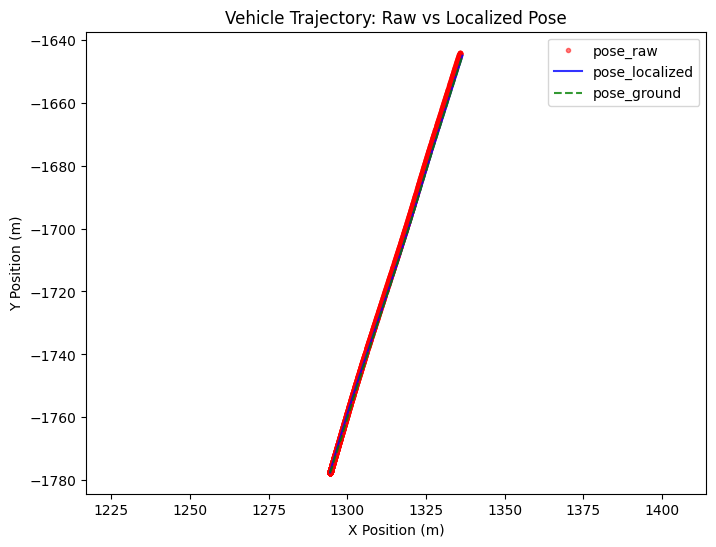

In [4]:
import matplotlib.pyplot as plt

# Read topics into DataFrames
pose_raw_csv = b.message_by_topic('/pose_raw')
pose_raw = pd.read_csv(pose_raw_csv)

pose_loc_csv = b.message_by_topic('/pose_localized')
pose_loc = pd.read_csv(pose_loc_csv)

pose_ground_csv = b.message_by_topic('/pose_ground_truth')
pose_ground = pd.read_csv(pose_ground_csv)

# Plot X vs Y for each
plt.figure(figsize=(8,6))
plt.plot(pose_raw['pose.position.x'], pose_raw['pose.position.y'], 'r.', alpha=0.5, label='pose_raw')
plt.plot(pose_loc['pose.position.x'], pose_loc['pose.position.y'], 'b-', alpha=0.8, label='pose_localized')
plt.plot(pose_ground['pose.position.x'], pose_ground['pose.position.y'], 'g--', alpha=0.8, label='pose_ground')

plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Vehicle Trajectory: Raw vs Localized Pose")
plt.legend()
plt.axis("equal")
plt.show()


In [5]:
import numpy as np

# Align indices for pose_raw and pose_loc
common_indices = pose_loc.index

# Calculate variance for position (x, y, z) between pose_raw and pose_loc
var_x = np.var(pose_raw.loc[common_indices, 'pose.position.x'] - pose_loc['pose.position.x'])
var_y = np.var(pose_raw.loc[common_indices, 'pose.position.y'] - pose_loc['pose.position.y'])
var_z = np.var(pose_raw.loc[common_indices, 'pose.position.z'] - pose_loc['pose.position.z'])

print(f"Variance in X: {var_x}")
print(f"Variance in Y: {var_y}")
print(f"Variance in Z: {var_z}")

Variance in X: 164.4140197366276
Variance in Y: 1589.2341065536023
Variance in Z: 0.14617264367763752


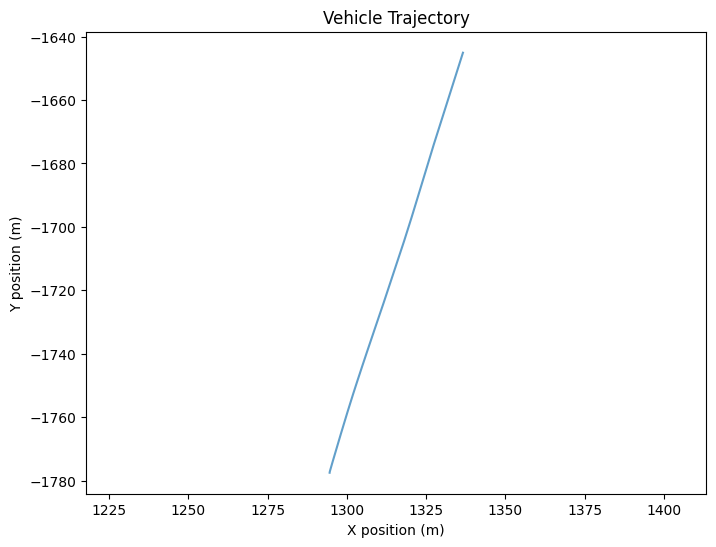

In [6]:

pose_csv = b.message_by_topic('/pose_localized')  # or '/pose_raw', '/pose'
pose_df = pd.read_csv(pose_csv)


# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(pose_df['pose.position.x'], pose_df['pose.position.y'], alpha=0.7)
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.title("Vehicle Trajectory")
plt.axis("equal")
plt.show()




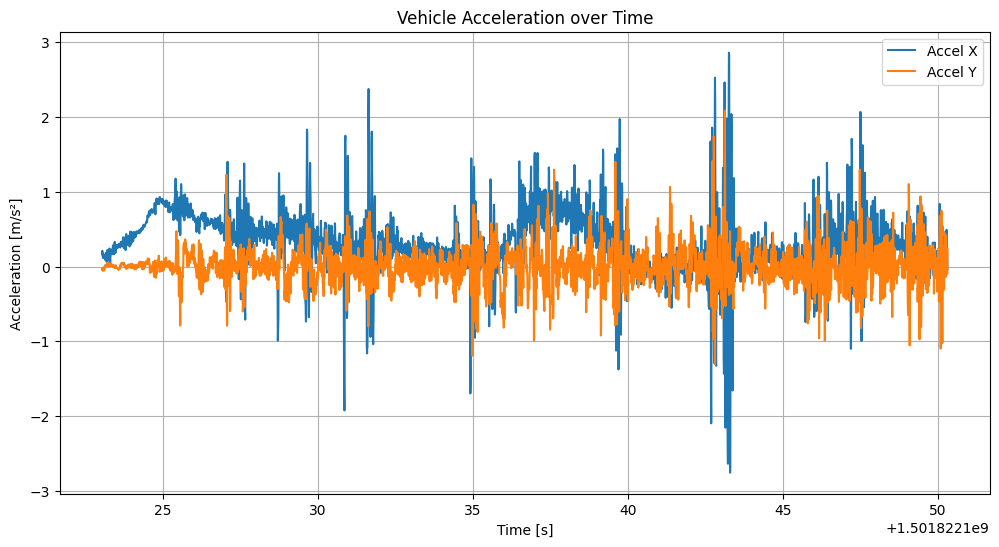

In [7]:
imu_csv = b.message_by_topic('/imu')

imu_df = pd.read_csv(imu_csv)

# Plot acceleration vs time
plt.figure(figsize=(12,6))
plt.plot(imu_df['Time'], imu_df['linear_acceleration.x'], label='Accel X')
plt.plot(imu_df['Time'], imu_df['linear_acceleration.y'], label='Accel Y')
#plt.plot(imu_df['Time'], imu_df['linear_acceleration.z'], label='Accel Z')

plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s²]')
plt.title('Vehicle Acceleration over Time')
plt.legend()
plt.grid(True)
plt.show()

Clean up and organize data

In [8]:
for topic in b.topic_table['Topics']:
    csv = b.message_by_topic(topic)
    df = pd.read_csv(csv)
    print(f"Columns from topic '{topic}':")
    print(df.columns)

Columns from topic '/gps':
Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'status.status', 'status.service', 'latitude',
       'longitude', 'altitude', 'position_covariance_0',
       'position_covariance_1', 'position_covariance_2',
       'position_covariance_3', 'position_covariance_4',
       'position_covariance_5', 'position_covariance_6',
       'position_covariance_7', 'position_covariance_8',
       'position_covariance_type'],
      dtype='object')
Columns from topic '/gps_time':
Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'time_ref.secs', 'time_ref.nsecs', 'source'],
      dtype='object')
Columns from topic '/image_front_left':
Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'height', 'width', 'encoding', 'is_bigendian',
       'step', 'data'],
      dtype='object')
Columns from topic '/imu':
Index(['Time', 'header.seq', 

| Keep | Reason | Toss | Reason|
|----------|----------|----------|----------|
| /gps  | Contains positional data - Drop covariance for now | /gps_time | Useful for syncing multiple sensors, not a concern here (For now)
| /imu | Contains inertial data - Drop covariance  | /image_fron_left | Can't clean up the blob data, will look at later however
| /pose_* | Drop seq and frame_id | /tf | Skip transforms for now
| /velocity_raw* | Drop seq and frame_id | /lidar_*_scan | Need to parse Velodyne format, re-visit after positional data

Set up data frames for each topic set to keep

In [9]:
gps_csv = b.message_by_topic('/gps')
gps_df = pd.read_csv(gps_csv)

imu_csv = b.message_by_topic('/imu')
imu_df = pd.read_csv(imu_csv)

# pose_localized chosed based on low variance from raw
pose_csv = b.message_by_topic('/pose_localized')
pose_df = pd.read_csv(pose_csv)

velocity_csv = b.message_by_topic('/velocity_raw')
velocity_df = pd.read_csv(velocity_csv)


In [10]:
def clean_df(df, keep_cols):
    # Normalize time
    df = df.copy()
    df["Time"] -= df["Time"].iloc[0]
    
    # Keep only useful columns
    df = df[["Time"] + keep_cols]
    
    # Drop NaNs if any
    df = df.dropna()
    return df

gps_clean = clean_df(gps_df, ["latitude", "longitude", "altitude"])

imu_clean = clean_df(imu_df, [
    "orientation.x", "orientation.y", "orientation.z", "orientation.w",
    "angular_velocity.x", "angular_velocity.y", "angular_velocity.z",
    "linear_acceleration.x", "linear_acceleration.y", "linear_acceleration.z"
])

pose_clean = clean_df(pose_df, [
    "pose.position.x", "pose.position.y", "pose.position.z",
    "pose.orientation.x", "pose.orientation.y", "pose.orientation.z", "pose.orientation.w"
])

velocity_clean = clean_df(velocity_df, ["vector.x", "vector.y", "vector.z"])


Quick check to verify all

In [11]:
print("Cleaned GPS Data:")
print(gps_clean.head(2))

print("Cleaned IMU Data:")
print(imu_clean.head(2))

print("Cleaned Pose Data:")
print(pose_clean.head(2))

print("Cleaned Velocity Data:")
print(velocity_clean.head(2))

Cleaned GPS Data:
       Time   latitude  longitude    altitude
0  0.000000  42.305971 -83.244833  156.021419
1  0.007969  42.305971 -83.244833  156.021404
Cleaned IMU Data:
       Time  orientation.x  orientation.y  orientation.z  orientation.w  \
0  0.000000       0.005023       0.014810       0.587497       0.809075   
1  0.007969       0.005020       0.014818       0.587499       0.809074   

   angular_velocity.x  angular_velocity.y  angular_velocity.z  \
0            0.002431            0.001477            0.000697   
1            0.000801            0.003047            0.000719   

   linear_acceleration.x  linear_acceleration.y  linear_acceleration.z  
0               0.165241              -0.026345               0.076119  
1               0.210251              -0.039950               0.109381  
Cleaned Pose Data:
       Time  pose.position.x  pose.position.y  pose.position.z  \
0  0.000000      1294.558672     -1777.535296        -5.597900   
1  0.050004      1294.557735     -

I'd like to explore the correlation and predictive capablities of the imu data on pose data

In [12]:
# IMU features
imu_features = ["linear_acceleration.x", "linear_acceleration.y", "linear_acceleration.z",
                "angular_velocity.x", "angular_velocity.y", "angular_velocity.z",
                "orientation.x", "orientation.y", "orientation.z", "orientation.w"]

# Pose targets
pose_targets = ["pose.position.x", "pose.position.y", "pose.position.z",
                "pose.orientation.x", "pose.orientation.y", "pose.orientation.z", "pose.orientation.w"]

# Align IMU and pose by time
df_combined = pd.merge_asof(pose_clean.sort_values("Time"),
                            imu_clean.sort_values("Time"),
                            on="Time",
                            direction="nearest")



<Axes: >

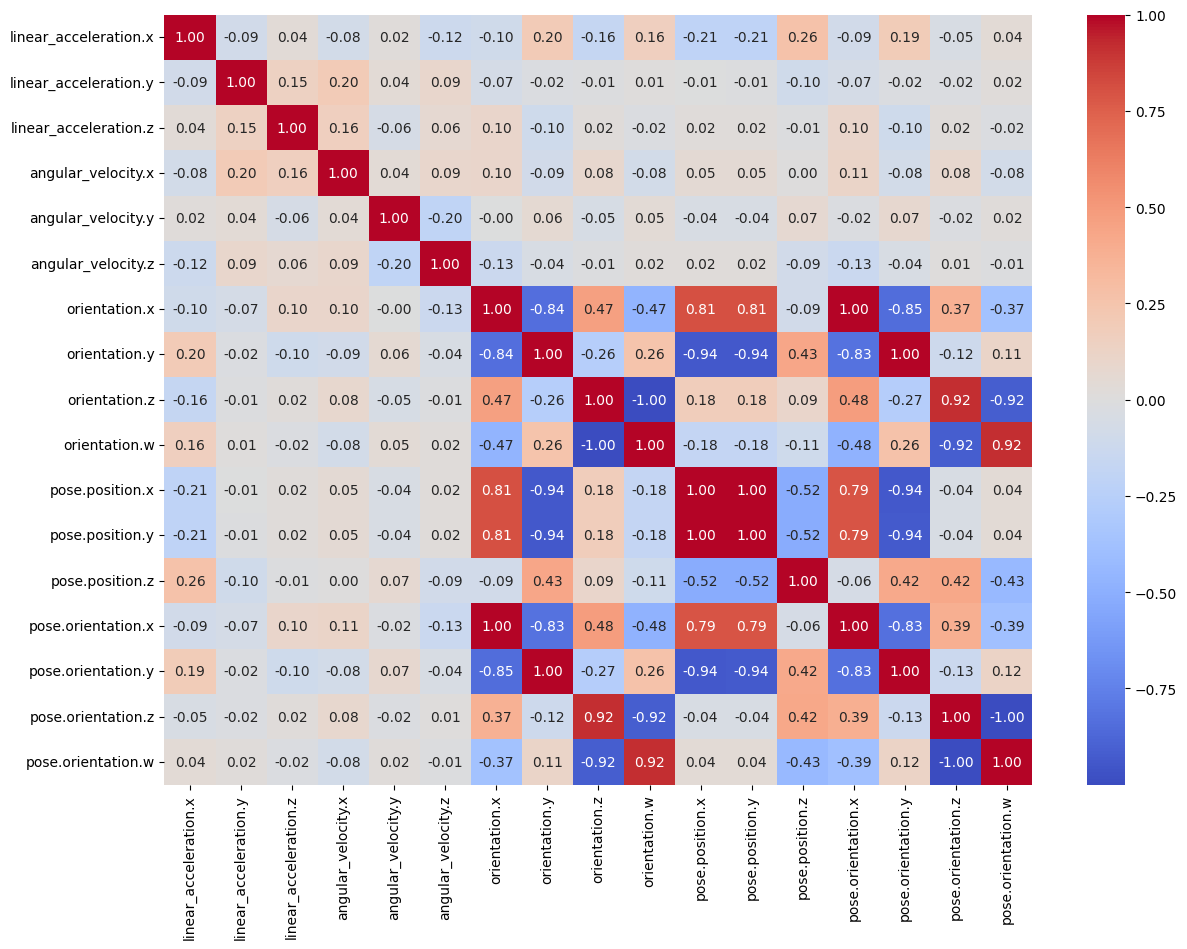

In [13]:
import seaborn as sns

corr_matrix = df_combined[imu_features + pose_targets].corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

Lets drop the obvious correlations *(pose.orientation.x and orientation.x, ect.)* and non-cross topic correlations *(pose.orientation.y and pose.orientation.x)*

<Axes: >

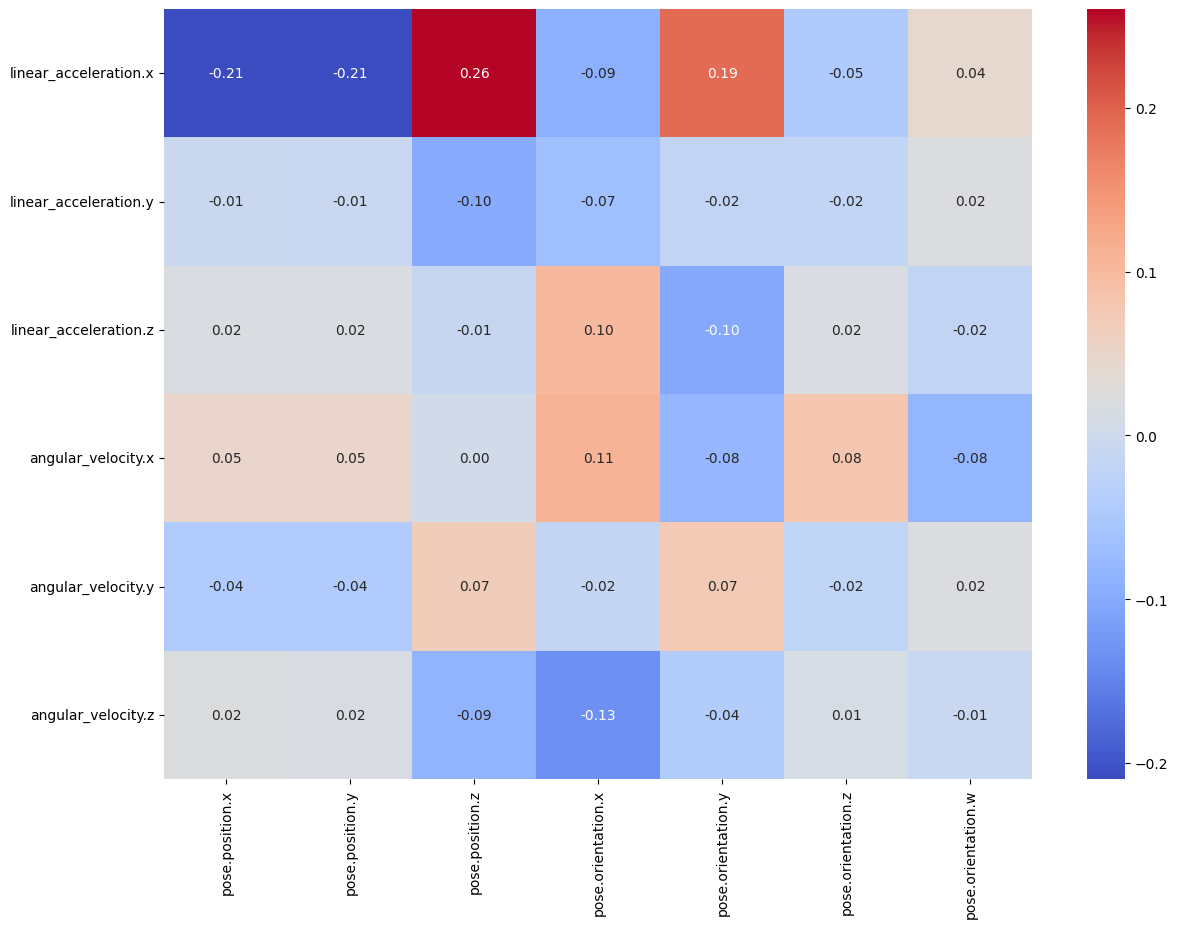

In [14]:
imu_features = ["linear_acceleration.x", "linear_acceleration.y", "linear_acceleration.z",
                "angular_velocity.x", "angular_velocity.y", "angular_velocity.z"]
corr_matrix = df_combined[imu_features + pose_targets].corr()
# Keep only correlations between IMU and Pose
corr_filtered = corr_matrix.loc[imu_features, pose_targets]
plt.figure(figsize=(14,10))
sns.heatmap(corr_filtered, annot=True, fmt=".2f", cmap="coolwarm")

With the highest coefficiant of 0.26 there likely isn't a simple linear correlation between the two.

Pivoting into regression model

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features: IMU linear acceleration + angular velocity
imu_features = ["linear_acceleration.x", "linear_acceleration.y", "linear_acceleration.z",
                "angular_velocity.x", "angular_velocity.y", "angular_velocity.z"]

# Targets: Pose positions
pose_targets = ["pose.position.x", "pose.position.y", "pose.position.z"]

X = df_combined[imu_features]
y = df_combined[pose_targets]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression baseline

Mean Squared Error: 668.3775588429664
R^2 Score: 0.01913808555061321


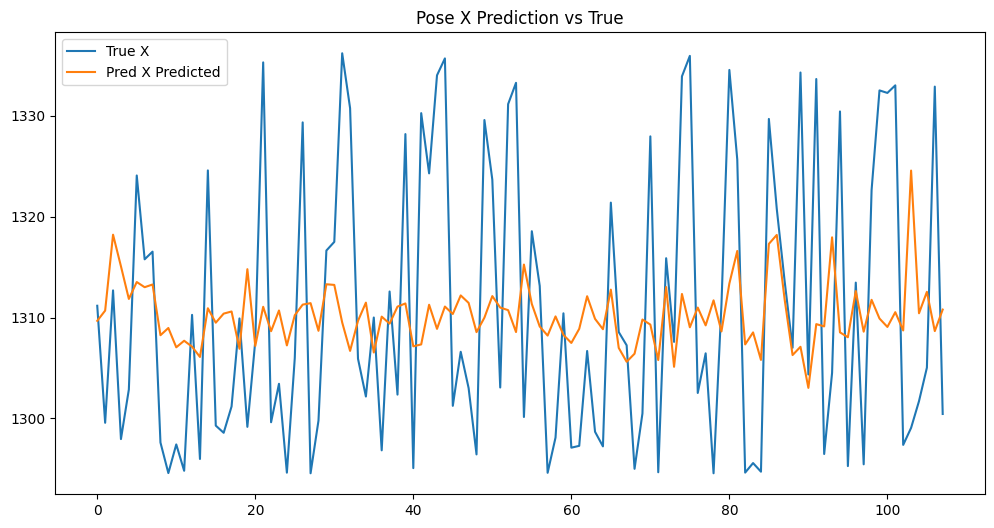

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.figure(figsize=(12,6))
plt.plot(y_test["pose.position.x"].values, label="True X")
plt.plot(y_pred[:,0], label="Pred X Predicted")
plt.legend()
plt.title("Pose X Prediction vs True")
plt.show()

That's pretty awful as well, attempting random forest model

Mean Squared Error (RF): 595.679794334763
R^2 Score (RF): 0.1932927168258203


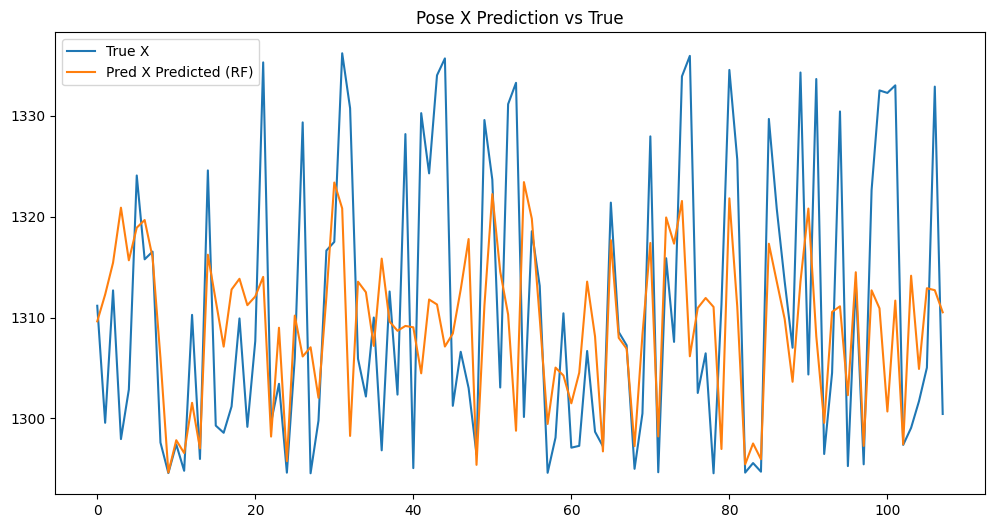

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=22)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error (RF): {mse_rf}")
print(f"R^2 Score (RF): {r2_rf}")

plt.figure(figsize=(12,6))
plt.plot(y_test["pose.position.x"].values, label="True X")
plt.plot(y_pred_rf[:,0], label="Pred X Predicted (RF)")
plt.legend()
plt.title("Pose X Prediction vs True")
plt.show()


Honestly, the jump in R^2 is promising. The mean squared initially feels high but the mean position in each orientation is in the thousands so relatively fine.


In [27]:

print("Mean pose.position.x:", y_pred[:, 0].mean())
print("Mean pose.position.y:", y_pred[:, 1].mean())
print("Mean pose.position.z:", y_pred[:, 2].mean())

Mean pose.position.x: 1310.2423131707035
Mean pose.position.y: -1727.8446395962133
Mean pose.position.z: -6.14509488017105


This however was done with the times of the two sensors synced. Because instentaneous accelleration does not mean instentaneous positional change, adding a time offest between the two could potentially provide a better correlation.

In [67]:
#number of offsets (in seconds)
offsets = [1,2,3]

imu_offset_df = df_combined[imu_features + ['Time']].copy()

for offset in offsets:
    for feature in imu_features:
        imu_offset_df[f"{feature}_offset_{offset}"] = imu_offset_df[feature].shift(offset)

imu_offset_df.dropna(inplace=True)

y_offset = df_combined.loc[imu_offset_df.index, pose_targets]

X_train, X_test, y_train, y_test = train_test_split(imu_offset_df.drop(columns=['Time']), 
                                                    y_offset, test_size=0.2, random_state=22)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mean Squared Error (RF with Offset): 371.0014509350613
R^2 Score (RF with Offset): 0.390436271300487


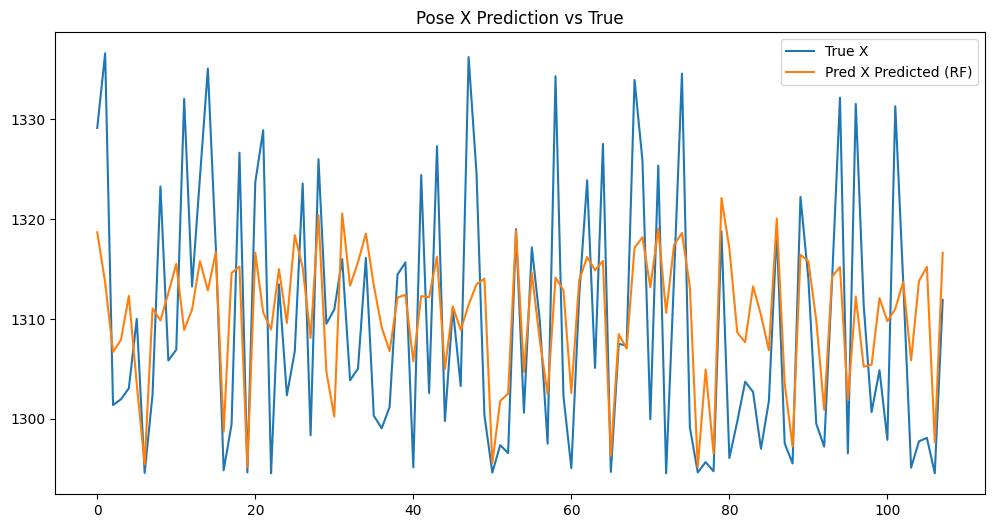

In [68]:
rf_offset = RandomForestRegressor(n_estimators=100, random_state=22)
rf_offset.fit(X_train_scaled, y_train)

y_pred_offset = rf_offset.predict(X_test_scaled)

mse_offset = mean_squared_error(y_test, y_pred_offset)
r2_offset = r2_score(y_test, y_pred_offset)

print(f"Mean Squared Error (RF with Offset): {mse_offset}")
print(f"R^2 Score (RF with Offset): {r2_offset}")

plt.figure(figsize=(12,6))
plt.plot(y_test["pose.position.x"].values, label="True X")
plt.plot(y_pred_offset[:,0], label="Pred X Predicted (RF)")
plt.legend()
plt.title("Pose X Prediction vs True")
plt.show()

That's a significant improvement in performance metrics after incorporating the time offsets. The Random Forest model with offsets better captures the temporal dynamics of the IMU data, resulting in more accurate pose predictions.

I additionally tested with time offsets of [1,2], [1,2,3,4], and other lengths up to 10, but [1,2,3] yielded the best R² score.

For further analysis, I plan to explore splitting the models along each axis (considering the scale of `pose.orientation.w`) and other normalization techniques. For now, I will move into LIDAR and visual analysis. After all, this is mostly for practice, and I feel I have successfully re-familiarized myself with predictive modeling.





In [70]:
results = []
max_offset = 10

for end_offset in range(1, max_offset+1):
    offsets = list(range(1, end_offset+1))
    
    # Start fresh each iteration
    df_temp = df_combined[imu_features + ['Time']].copy()
    
    for offset in offsets:
        for feature in imu_features:
            df_temp[f"{feature}_offset_{offset}"] = df_temp[feature].shift(offset)
    
    # Drop NaNs after creating all offsets
    df_temp.dropna(inplace=True)
    
    # Align y to the same index
    y_temp = df_combined.loc[df_temp.index, pose_targets]
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp.drop(columns=['Time']),
                                                        y_temp, test_size=0.2, random_state=22)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    rf = RandomForestRegressor(n_estimators=100, random_state=22)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({"offsets": offsets.copy(), "MSE": mse, "R2": r2})

results_df = pd.DataFrame(results)
print(results_df)


                           offsets         MSE        R2
0                              [1]  458.437291  0.300863
1                           [1, 2]  465.705571  0.321539
2                        [1, 2, 3]  371.001451  0.390436
3                     [1, 2, 3, 4]  371.690781  0.339911
4                  [1, 2, 3, 4, 5]  420.273773  0.345479
5               [1, 2, 3, 4, 5, 6]  406.830561  0.383383
6            [1, 2, 3, 4, 5, 6, 7]  384.529408  0.387857
7         [1, 2, 3, 4, 5, 6, 7, 8]  396.335139  0.384225
8      [1, 2, 3, 4, 5, 6, 7, 8, 9]  419.674188  0.379293
9  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  370.013733  0.332636


Mean Squared Error (XGB): 670.3699340820312
R^2 Score (XGB): -0.0932256355881691


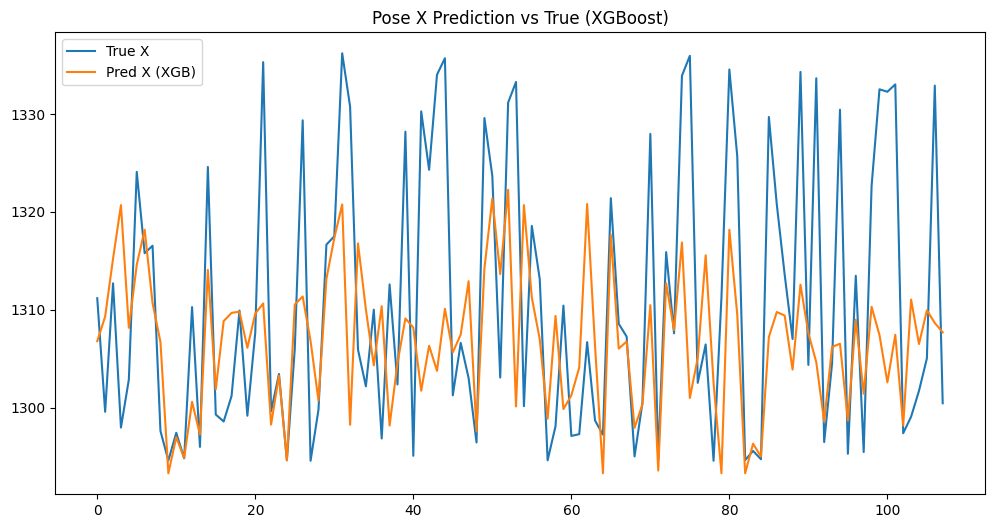

In [79]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

X = df_combined[imu_features]
y = df_combined[pose_targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

reg = xgb.XGBRegressor(tree_method="hist", early_stopping_rounds=2)

reg.fit(X_train.values, y_train.values, eval_set=[(X_test.values, y_test.values)], verbose=False)

# predict
y_pred_xgb = reg.predict(X_test.values)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Mean Squared Error (XGB): {mse_xgb}")
print(f"R^2 Score (XGB): {r2_xgb}")

plt.figure(figsize=(12,6))
plt.plot(y_test["pose.position.x"].values, label="True X")
plt.plot(y_pred_xgb[:,0], label="Pred X (XGB)")
plt.legend()
plt.title("Pose X Prediction vs True (XGBoost)")
plt.show()

# LiDAR

Objective: Build Perception -> planning pipeline. Use LiDAR for scans with vision object detection/classification and tie it back to pose for colision detection.

Clean and setup skipped topics

In [98]:
lidar_blue_scan_csv = b.message_by_topic('/lidar_blue_scan')
lidar_blue_scan_df = pd.read_csv(lidar_blue_scan_csv)

lidar_red_scan_csv = b.message_by_topic('/lidar_red_scan')
lidar_red_scan_df = pd.read_csv(lidar_red_scan_csv)

lidar_green_scan_csv = b.message_by_topic('/lidar_green_scan')
lidar_green_scan_df = pd.read_csv(lidar_green_scan_csv)

lidar_yellow_scan_csv = b.message_by_topic('/lidar_yellow_scan')
lidar_yellow_scan_df = pd.read_csv(lidar_yellow_scan_csv)

image_front_left_csv = b.message_by_topic('/image_front_left')
image_front_left_df = pd.read_csv(image_front_left_csv)

#tf is already in a clean format of just time and transforms


In [99]:
#Clean topics that were skipped

lidar_blue_scan_clean = clean_df(lidar_blue_scan_df, ['packets'])
lidar_red_scan_clean = clean_df(lidar_red_scan_df, ['packets'])
lidar_green_scan_clean = clean_df(lidar_green_scan_df, ['packets'])
lidar_yellow_scan_clean = clean_df(lidar_yellow_scan_df, ['packets'])

image_front_left_clean = clean_df(image_front_left_df, ['height', 'width', 'encoding', 'is_bigendian','step', 'data'])


In [100]:
print(lidar_blue_scan_clean.head(2))
print(lidar_red_scan_clean.head(2))
print(lidar_green_scan_clean.head(2))
print(lidar_yellow_scan_clean.head(2))
print(image_front_left_clean.head(2))

       Time                                            packets
0  0.000000  [stamp: \n  secs: 1501822123\n  nsecs:  308508...
1  0.104518  [stamp: \n  secs: 1501822123\n  nsecs: 1353690...
       Time                                            packets
0  0.000000  [stamp: \n  secs: 1501822123\n  nsecs:  307230...
1  0.104517  [stamp: \n  secs: 1501822123\n  nsecs: 1352400...
       Time                                            packets
0  0.000000  [stamp: \n  secs: 1501822123\n  nsecs:  308649...
1  0.104517  [stamp: \n  secs: 1501822123\n  nsecs: 1353819...
       Time                                            packets
0  0.000000  [stamp: \n  secs: 1501822123\n  nsecs:  303940...
1  0.104514  [stamp: \n  secs: 1501822123\n  nsecs: 1349079...
       Time  height  width encoding  is_bigendian  step  \
0  0.000000     215    414     8UC3             0  1242   
1  0.067101     215    414     8UC3             0  1242   

                                                data  
0  b'QA)RB*

Split packets out across table

In [101]:
import re

# Extract all field names from the 'packets' column
all_fields = []
for packet in lidar_red_scan_clean['packets']:
    fields = re.findall(r"(\w+):", packet)
    all_fields.extend(fields)

unique_fields = set(all_fields)
print(unique_fields)

{'data', 'nsecs', 'secs', 'stamp'}


In [102]:
#just need the data because secs and nsecs already match time
#stamp is blank so we can drop it

def extract_data_column(df):
    df['data'] = df['packets'].apply(lambda x: re.findall(r"data: (\[.*?\])", x))
    df = df.drop(columns=['packets'])
    return df

lidar_blue_scan_clean = extract_data_column(lidar_blue_scan_clean)
lidar_red_scan_clean = extract_data_column(lidar_red_scan_clean)
lidar_green_scan_clean = extract_data_column(lidar_green_scan_clean)
lidar_yellow_scan_clean = extract_data_column(lidar_yellow_scan_clean)

In [103]:
print(lidar_blue_scan_clean.head(2))
print(lidar_red_scan_clean.head(2))
print(lidar_green_scan_clean.head(2))
print(lidar_yellow_scan_clean.head(2))

       Time                                               data
0  0.000000  [[255, 238, 53, 130, 160, 5, 15, 34, 5, 35, 14...
1  0.104518  [[255, 238, 109, 136, 89, 5, 14, 157, 4, 31, 7...
       Time                                               data
0  0.000000  [[255, 238, 35, 57, 142, 6, 5, 228, 5, 68, 202...
1  0.104517  [[255, 238, 133, 63, 145, 6, 4, 111, 6, 0, 200...
       Time                                               data
0  0.000000  [[255, 238, 30, 140, 190, 3, 11, 0, 0, 1, 203,...
1  0.104517  [[255, 238, 1, 6, 197, 3, 9, 0, 0, 1, 209, 3, ...
       Time                                               data
0  0.000000  [[255, 238, 145, 48, 0, 0, 10, 221, 7, 10, 0, ...
1  0.104514  [[255, 238, 252, 54, 0, 0, 10, 132, 6, 11, 0, ...


~~Confession, I had no idea what the data column meant until co-pilot cleared things up for me, from that and the [github](https://github.com/Ford/AVData) it looks like it is Pointcloud data that has been decoded to velodyne points~~

I will clean this section up later but skip to the next header for my continued efforts 

In [125]:
print(bagpath)

../data/raw/Sample-Data/Sample-Data.bag


In [154]:
from velodyne_decoder import Config, read_bag
from velodyne_decoder.velodyne_decoder_pylib import Model

config = Config(model=Model.HDL32E)

for stamp, topic, points in read_bag(bagpath, config, topics=["/lidar_blue_scan"]):
    print(f"Time: {stamp}, topic: {topic}, points shape: {points.shape}")
    break



ValueError: too many values to unpack (expected 3)

In [127]:

print(list(Model)) 

[Model.HDL64E_S1, Model.HDL64E_S2, Model.HDL64E_S3, Model.HDL32E, Model.VLP32A, Model.VLP32B, Model.VLP32C, Model.VLP16, Model.PuckHiRes, Model.VLS128]


In [121]:
import open3d as o3d
import numpy as np

# Pick a point cloud to visualize, e.g., the first one
stamp, points = clouds[0]

# 'points' is usually a Nx4 array: [x, y, z, intensity]
xyz = points[:, :3]  # ignore intensity for now

# Create an Open3D point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)

# Optional: add color based on intensity
if points.shape[1] > 3:
    intensity = points[:, 3]
    # Normalize intensity to [0,1] for coloring
    colors = np.repeat(intensity[:, np.newaxis], 3, axis=1)
    colors = (colors - colors.min()) / (colors.max() - colors.min())
    pcd.colors = o3d.utility.Vector3dVector(colors)

# Visualize
o3d.visualization.draw_geometries([pcd])


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


IndexError: list index out of range

## Ford AV Dataset Tutorial

Walking through the steps outlined on [github](https://github.com/Ford/AVData). The Lidar Map setup through roslaunch was facinating, but not demonstratable here. They do include a bag_to_csv python script they included which will be processed as follows

It took some modifications of the script [here](https://github.com/Ford/AVData/blob/master/ford_demo/scripts/bag_to_csv.py) but I was able to pull the bag file into csvs, look how great they look.

In [160]:
csv_path = "../data/raw/Bags/Sample-Dat"

lidar_blue_df_from_bag = pd.read_csv(csv_path + '/lidar_blue_scan.csv')

print("Old")
print(lidar_blue_scan_clean.head(2))

print("New")
print(lidar_blue_df_from_bag.head())

Old
       Time                                               data
0  0.000000  [[255, 238, 53, 130, 160, 5, 15, 34, 5, 35, 14...
1  0.104518  [[255, 238, 109, 136, 89, 5, 14, 157, 4, 31, 7...
New
       rosbagTimestamp  header  seq  stamp        secs      nsecs  \
0  1501822123030850887     NaN    0    NaN  1501822123   30850887   
1  1501822123135369062     NaN    0    NaN  1501822123  135369062   
2  1501822123262557983     NaN    0    NaN  1501822123  262557983   
3  1501822123365967988     NaN    0    NaN  1501822123  365967988   
4  1501822123474908113     NaN    0    NaN  1501822123  474908113   

       frame_id  packets   -     stamp.1  ...  -.179 stamp.180  secs.180  \
0  "lidar_blue"      NaN NaN  1501822123  ...    NaN       NaN       NaN   
1  "lidar_blue"      NaN NaN  1501822123  ...    NaN       NaN       NaN   
2  "lidar_blue"      NaN NaN  1501822123  ...    NaN       NaN       NaN   
3  "lidar_blue"      NaN NaN  1501822123  ...    NaN       NaN       NaN   
4  "lida

In [162]:
print("Cleaned LIDAR Blue Scan Data:", lidar_blue_df_from_bag.columns.tolist())
print("Number of Rows:", lidar_blue_df_from_bag.shape[0])

Cleaned LIDAR Blue Scan Data: ['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'packets', '-', 'stamp.1', 'secs.1', 'nsecs.1', 'data', '-.1', 'stamp.2', 'secs.2', 'nsecs.2', 'data.1', '-.2', 'stamp.3', 'secs.3', 'nsecs.3', 'data.2', '-.3', 'stamp.4', 'secs.4', 'nsecs.4', 'data.3', '-.4', 'stamp.5', 'secs.5', 'nsecs.5', 'data.4', '-.5', 'stamp.6', 'secs.6', 'nsecs.6', 'data.5', '-.6', 'stamp.7', 'secs.7', 'nsecs.7', 'data.6', '-.7', 'stamp.8', 'secs.8', 'nsecs.8', 'data.7', '-.8', 'stamp.9', 'secs.9', 'nsecs.9', 'data.8', '-.9', 'stamp.10', 'secs.10', 'nsecs.10', 'data.9', '-.10', 'stamp.11', 'secs.11', 'nsecs.11', 'data.10', '-.11', 'stamp.12', 'secs.12', 'nsecs.12', 'data.11', '-.12', 'stamp.13', 'secs.13', 'nsecs.13', 'data.12', '-.13', 'stamp.14', 'secs.14', 'nsecs.14', 'data.13', '-.14', 'stamp.15', 'secs.15', 'nsecs.15', 'data.14', '-.15', 'stamp.16', 'secs.16', 'nsecs.16', 'data.15', '-.16', 'stamp.17', 'secs.17', 'nsecs.17', 'data.16', '-.17', 'stamp.18

In [ ]:
import os

csv_files = [f for f in os.listdir(csv_path) if f.endswith('.csv')]

csv_dfs = {f[:-4]: pd.read_csv(os.path.join(csv_path, f)) for f in csv_files}

for name, df in csv_dfs.items():
    print(f"{name}: shape={df.shape}")

gps: shape=(4896, 15)
image_front_left: shape=(326, 13)
imu: shape=(4896, 23)
lidar_blue_scan: shape=(246, 913)
lidar_green_scan: shape=(246, 913)
lidar_red_scan: shape=(246, 913)
lidar_yellow_scan: shape=(245, 913)
pose_ground_truth: shape=(4858, 17)
pose_localized: shape=(539, 17)
pose_raw: shape=(4872, 17)
tf: shape=(4858, 20)
velocity_raw: shape=(4872, 11)


In [ ]:
#print(csv_dfs["lidar_green_scan"].head(200))
#print(csv_dfs["lidar_green_scan"].columns[:30])
colname = "seq"
print(csv_dfs["lidar_green_scan"][csv_dfs["lidar_green_scan"][colname].notna()][colname])


         rosbagTimestamp  header  seq  stamp        secs      nsecs  \
0    1501822123030864953     NaN    0    NaN  1501822123   30864953   
1    1501822123135381937     NaN    0    NaN  1501822123  135381937   
2    1501822123262572050     NaN    0    NaN  1501822123  262572050   
3    1501822123367091894     NaN    0    NaN  1501822123  367091894   
4    1501822123476033926     NaN    0    NaN  1501822123  476033926   
..                   ...     ...  ...    ...         ...        ...   
241  1501822149723840951     NaN    0    NaN  1501822149  723840951   
242  1501822149830018997     NaN    0    NaN  1501822149  830018997   
243  1501822149941170930     NaN    0    NaN  1501822149  941170930   
244  1501822150047902107     NaN    0    NaN  1501822150   47902107   
245  1501822150157946109     NaN    0    NaN  1501822150  157946109   

          frame_id  packets   -     stamp.1  ...  -.179 stamp.180  secs.180  \
0    "lidar_green"      NaN NaN  1501822123  ...    NaN       NaN   